# Problem statement

#### -A large U.S. Electrical appliance's retailer has many branches. There is no Fixed Price for a product(for various reasons),the SalesPerson has the freedom to choose the price at which they sell the product. There is no cap on the minimum and maximum quantity of sales on the Salesperson.Due to these reasons the average sale size and average quantity for a transaction varies.The company wants to do a 'Sales and Productivity' analysis.
#### -It is for this reason the company wants to implement a system to classify the reports into one of the Three categories, Suspicious/Not Suspicious/Indeterminate.
#### -The company also wants the Salespersons to be grouped into HighRisk or MediumRisk or LowRisk categories based on the report info provided by them.

# Overview of this notebook
### -Univariate Analysis
### -Multivariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("C:\\Users\\deeks\\Documents\\PhD\\PHD_TrainData_and_ProblemStatement-1558070454703\\PHD_TrainData_and_ProblemStatement")

In [3]:
train_data=pd.read_excel("Train.xlsx",header=0)

In [4]:
train_data.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
0,Rep10101,C21116,PR6112,182,1665,indeterminate
1,Rep10102,C21116,PR6112,182,1740,indeterminate
2,Rep10103,C21116,PR6253,101,1040,indeterminate
3,Rep10104,C21116,PR6253,283,4495,No
4,Rep10105,C21116,PR6294,108,1465,indeterminate


In [5]:
train_data.isnull().sum()
print(train_data.shape)
train_data.dtypes

(42582, 6)


ReportID           object
SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object

In [6]:
train_data.describe(include='all')

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
count,42582,42582,42582,4.258200e+04,4.258200e+04,42582
unique,42582,992,593,NaN,NaN,3
top,Rep37408,C21976,PR6253,NaN,NaN,indeterminate
freq,1,1359,2590,NaN,NaN,39846
mean,NaN,NaN,NaN,4.910048e+03,1.620923e+04,NaN
std,NaN,NaN,NaN,9.833621e+04,5.997195e+04,NaN
min,NaN,NaN,NaN,3.300000e+01,5.980000e+02,NaN
25%,NaN,NaN,NaN,1.110000e+02,1.345000e+03,NaN
50%,NaN,NaN,NaN,2.060000e+02,2.980000e+03,NaN
75%,NaN,NaN,NaN,1.136000e+03,1.076500e+04,NaN


In [7]:
train_data['ReportID']=train_data['ReportID'].astype('category')
train_data['SalesPersonID']=train_data['SalesPersonID'].astype('category')
train_data['ProductID']=train_data['ProductID'].astype('category')
train_data['Suspicious']=train_data['Suspicious'].astype('category')

In [8]:
train_data.dtypes

ReportID           category
SalesPersonID      category
ProductID          category
Quantity              int64
TotalSalesValue       int64
Suspicious         category
dtype: object

In [9]:
print(train_data.ProductID.unique().shape)
print(train_data.SalesPersonID.unique().shape)
print(train_data.ReportID.unique().shape)

(593,)
(992,)
(42582,)


#### The above numericals indicates that there are:-
#### 1) 593 Products
#### 2) 992 Sales Persons
#### 3) 42582 transactions had done

## Univariate Analysis

In [10]:
100*train_data.Suspicious.value_counts()/len(train_data.Suspicious)

indeterminate    93.574750
No                6.000188
Yes               0.425062
Name: Suspicious, dtype: float64

#### This shows that the transactions made by the sales persons are 0.4% Fraud; 6% are Not Fraud; 93% are not able to determine

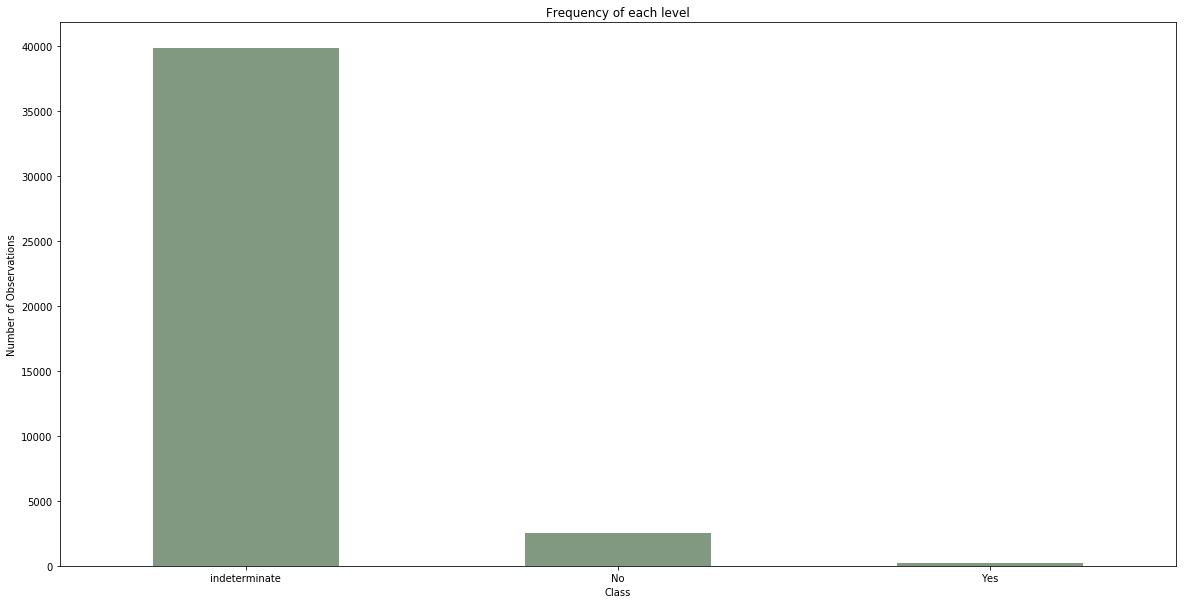

In [11]:
plt.figure(figsize=(20,10))
count_classes = pd.value_counts(train_data['Suspicious'], sort = True)
count_classes.plot(kind = 'bar', rot=0,color='#819980')
plt.title("Frequency of each level")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

## Bivariate Analysis

Text(-15.075,0.5,'TotalSalesValue')

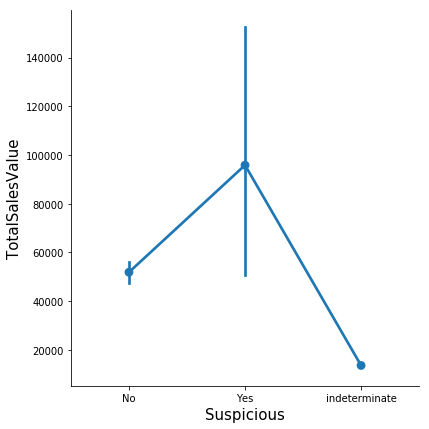

In [12]:
sns.factorplot(x="Suspicious", y="TotalSalesValue", data=train_data,size=6)
plt.xlabel("Suspicious", fontsize=15)
plt.ylabel("TotalSalesValue", fontsize=15)

Text(-15.075,0.5,'Quantity of products')

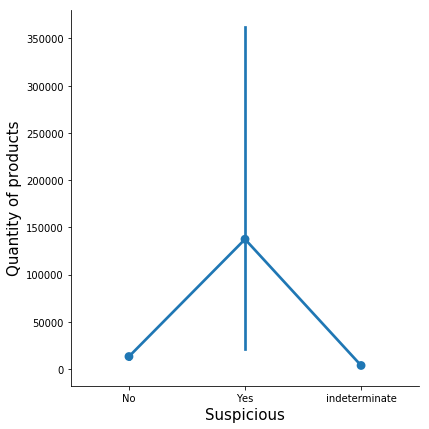

In [13]:
sns.factorplot(x="Suspicious", y="Quantity", data=train_data,size=6)
plt.xlabel("Suspicious", fontsize=15)
plt.ylabel("Quantity of products", fontsize=15)

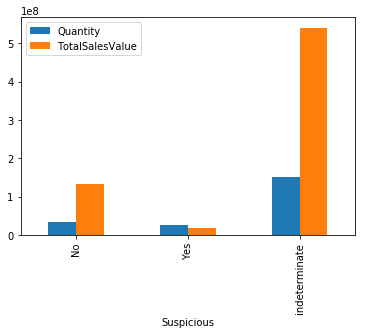

In [14]:
train_data.groupby('Suspicious')['Quantity','TotalSalesValue'].sum().plot.bar()

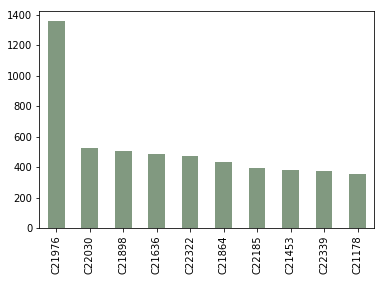

In [15]:
train_data['SalesPersonID'].value_counts().sort_index().sort_values(ascending=False)[:10].plot.bar(color='#819980')

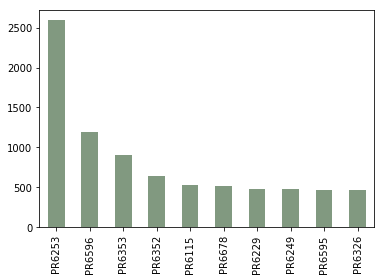

In [16]:
train_data['ProductID'].value_counts().sort_index().sort_values(ascending=False)[:10].plot.bar(color='#819980')

In [17]:
train_data['Price_of_oneProduct'] = train_data.apply(lambda row: row.TotalSalesValue / row.Quantity, axis = 1)

In [18]:
train_data.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Price_of_oneProduct
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030
3,Rep10104,C21116,PR6253,283,4495,No,15.883392
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815


In [19]:
train_data[train_data.Suspicious=='No'].SalesPersonID.count()

2555

In [20]:
train_Yes=train_data[train_data.Suspicious=='Yes']
train_Indeterminate=train_data[train_data.Suspicious=='indeterminate']
train_No=train_data[train_data.Suspicious=='No']

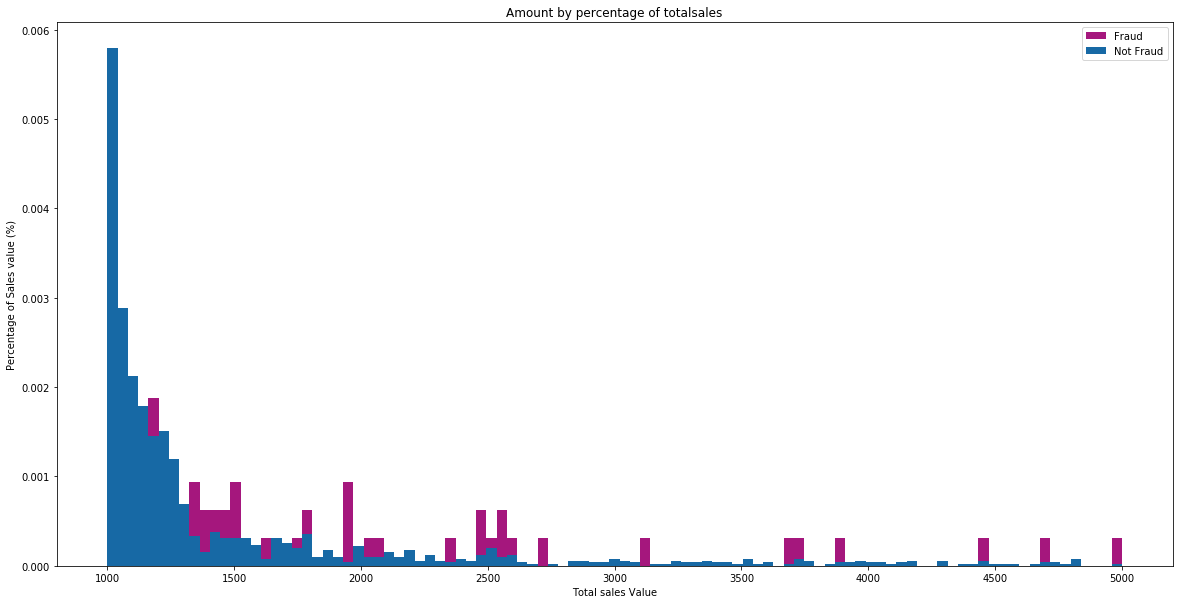

In [21]:
plt.figure(figsize=(20,10))
bins = np.linspace(1000, 5000, 100)
plt.hist(train_Yes.TotalSalesValue, alpha=1,bins=bins,color="#a5177d", normed=True, label='Fraud')
plt.hist(train_No.TotalSalesValue, alpha=1,bins=bins,color="#1769a5", normed=True, label='Not Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of totalsales")
plt.xlabel("Total sales Value")
plt.ylabel("Percentage of Sales value (%)");
plt.show()

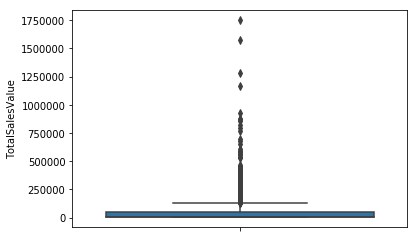

In [22]:
sns.boxplot(train_No.TotalSalesValue,orient='v')

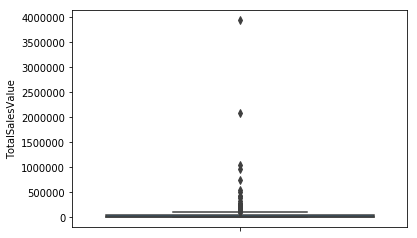

In [23]:
sns.boxplot(train_Yes.TotalSalesValue,orient='v')

In [24]:
train_data.groupby('Suspicious').apply(lambda x: x.count())

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Price_of_oneProduct
Suspicious,,,,,,,
No,2555,2555,2555,2555,2555,2555,2555
Yes,181,181,181,181,181,181,181
indeterminate,39846,39846,39846,39846,39846,39846,39846


In [25]:
train_Indeterminate.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Price_of_oneProduct
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815
5,Rep10106,C21116,PR6253,421,6655,indeterminate,15.807601


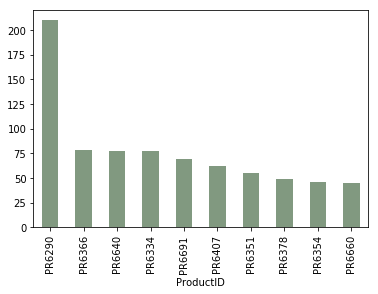

In [26]:
train_data.groupby(train_data['ProductID'])['Price_of_oneProduct'].mean().sort_index().sort_values(ascending=False)[:10].plot.bar(color='#819980')

### Above products are  top 10 high valued products

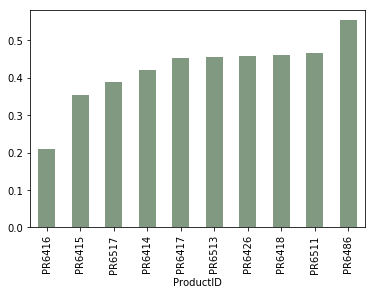

In [27]:
train_data.groupby(train_data['ProductID'])['Price_of_oneProduct'].mean().sort_index().sort_values(ascending=True)[:10].plot.bar(color='#819980')

### Above are low valued Products

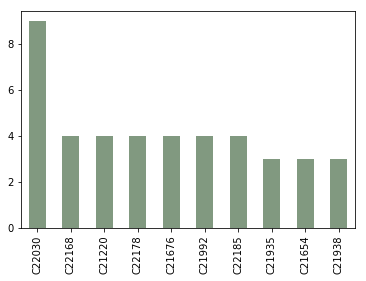

In [28]:
train_Yes['SalesPersonID'].value_counts().sort_values(ascending=False)[:10].plot.bar(color='#819980')

### These salesmen made high number of 'Fraud' transactions

In [29]:
total_quantity=train_data['Quantity'].sum()
total_totalsalesvalue=train_data['TotalSalesValue'].sum()

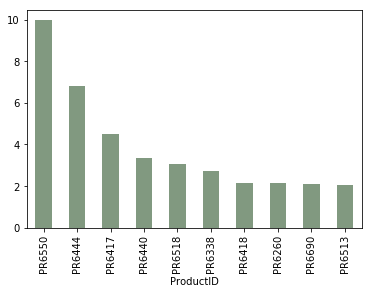

In [30]:
(((train_data.groupby(train_data['ProductID'])['Quantity'].sum())/(total_quantity))*100).sort_index().sort_values(ascending=False)[:10].plot.bar(color='#819980')

#### Top 10 products got saled in abundance amount compared to other products

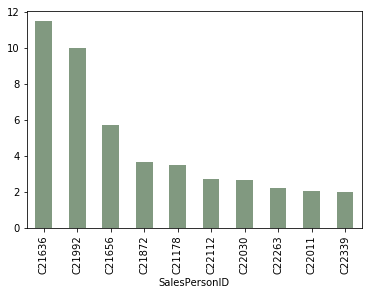

In [31]:
(((train_data.groupby(train_data['SalesPersonID'])['Quantity'].sum())/(total_quantity))*100).sort_index().sort_values(ascending=False)[:10].plot.bar(color='#819980')

#### Top 10 salesmen who sold high amount of quantity

In [32]:
high_sales_person=train_data.groupby(['SalesPersonID']).sum().sort_values(by='TotalSalesValue',ascending=False).head(10)
low_sales_person=train_data.groupby(['SalesPersonID']).sum().sort_values(by='TotalSalesValue',ascending=False).tail(10)

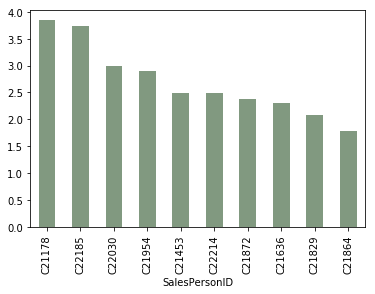

In [33]:
((high_sales_person['TotalSalesValue']/total_totalsalesvalue)*100).plot.bar(color='#819980')

#### Top 10 salesmen having high sales value

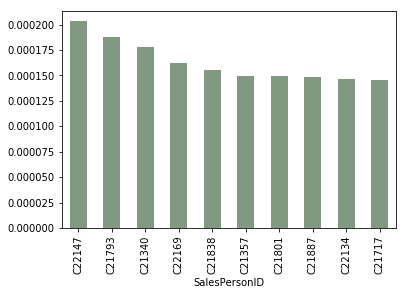

In [34]:
((low_sales_person['TotalSalesValue']/total_totalsalesvalue)*100).plot.bar(color='#819980')

#### top 10 Salesmen having low sales value

In [35]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [36]:
outlier_datapoints = detect_outlier(train_data['Price_of_oneProduct'])
print(len(outlier_datapoints))

40


In [37]:
train_df=train_data.groupby(["ProductID"]).median()

In [38]:
train_df.describe(include='all')

,Quantity,TotalSalesValue,Price_of_oneProduct
count,593.000000,593.000000,593.000000
mean,3785.749578,8782.508432,10.499033
std,15485.057554,14432.507902,8.049066
min,49.000000,1010.000000,0.221817
25%,127.000000,1767.500000,5.299406
50%,307.000000,3515.000000,9.891914
75%,1788.000000,9120.000000,12.836538
max,252146.000000,119640.000000,78.850932


In [39]:
train_df=train_df.drop(['TotalSalesValue','Quantity'],axis = 1)

In [40]:
type(train_df)

pandas.core.frame.DataFrame

In [41]:
train_df=train_df.rename(columns={'Price_of_oneProduct': 'Avg_of_eachProduct'})

In [42]:
train_updated = train_data.join(train_df, on='ProductID')
train_updated.describe(include='all')

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Price_of_oneProduct,Avg_of_eachProduct
count,42582,42582,42582,4.258200e+04,4.258200e+04,42582,42582.000000,42582.000000
unique,42582,992,593,NaN,NaN,3,NaN,NaN
top,Rep52682,C21976,PR6253,NaN,NaN,indeterminate,NaN,NaN
freq,1,1359,2590,NaN,NaN,39846,NaN,NaN
mean,NaN,NaN,NaN,4.910048e+03,1.620923e+04,NaN,16.372971,11.942390
std,NaN,NaN,NaN,9.833621e+04,5.997195e+04,NaN,79.544612,6.945922
min,NaN,NaN,NaN,3.300000e+01,5.980000e+02,NaN,0.005320,0.221817
25%,NaN,NaN,NaN,1.110000e+02,1.345000e+03,NaN,6.781874,7.874892
50%,NaN,NaN,NaN,2.060000e+02,2.980000e+03,NaN,10.742574,10.990099
75%,NaN,NaN,NaN,1.136000e+03,1.076500e+04,NaN,16.385542,14.295775


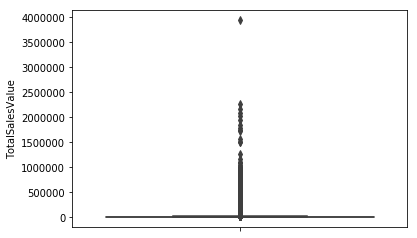

In [43]:
sns.boxplot(x=train_updated['TotalSalesValue'],orient='v')

In [44]:
Q1 = train_updated.quantile(0.25)
Q3 = train_updated.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity               1025.000000
TotalSalesValue        9420.000000
Price_of_oneProduct       9.603668
Avg_of_eachProduct        6.420883
dtype: float64


In [45]:
data1 = train_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
data1 = data1.rename(columns={'TotalSalesValue': 'Average sales per person'})
train_updated = train_updated.join(data1,on = ['SalesPersonID'])

In [46]:
train_updated.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,Price_of_oneProduct,Avg_of_eachProduct,Average sales per person
0,Rep10101,C21116,PR6112,182,1665,indeterminate,9.148352,11.420455,1740.0
1,Rep10102,C21116,PR6112,182,1740,indeterminate,9.560440,11.420455,1740.0
2,Rep10103,C21116,PR6253,101,1040,indeterminate,10.297030,11.208791,1740.0
3,Rep10104,C21116,PR6253,283,4495,No,15.883392,11.208791,1740.0
4,Rep10105,C21116,PR6294,108,1465,indeterminate,13.564815,13.354430,1740.0


In [47]:
outlier_datapoints = detect_outlier(train_data['TotalSalesValue'])
print(len(outlier_datapoints))

531


In [48]:
data2 = train_updated.groupby(['SalesPersonID'])[['Quantity']].mean()
data2 = data2.rename(columns={'Quantity': 'Average amount Quantity per Person'})
train_updated = train_updated.join(data2,on=['SalesPersonID'])

In [49]:
data3 = train_updated.groupby(['SalesPersonID'])[['ProductID']].count()
data3 = data3.rename(columns={'ProductID': 'No of products per person'})
train_updated = train_updated.join(data3,on=['SalesPersonID'])

In [50]:
data4 = train_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
data4=data4.rename(columns={'Quantity': 'sum of each product quuantity per person'})
train_updated = train_updated.join(data4,on=['SalesPersonID','ProductID'])

In [51]:
data5 = train_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
data5 =data5.rename(columns={'TotalSalesValue': 'sum of each product sales per person'})
train_updated = train_updated.join(data5,on=['SalesPersonID','ProductID'])

In [52]:
data6 = train_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].median()
data6 =data6.rename(columns={'TotalSalesValue': 'Avg of each product sales per person'})
train_updated = train_updated.join(data6,on=['SalesPersonID','ProductID'])

In [53]:
data7 = train_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].mean()
data7 =data7.rename(columns={'Quantity': 'Avg of each product quuantity per person'})
train_updated = train_updated.join(data7,on=['SalesPersonID','ProductID'])

In [54]:
data8=train_updated.groupby(['ProductID'])[['Quantity']].mean()
data8 = data8.rename(columns={'Quantity': 'Average amount Quantity per Product'})
train_updated = train_updated.join(data8,on=['ProductID'])

In [55]:
data9=train_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
data9 = data9.rename(columns={'TotalSalesValue': 'Average sales per Product'})
train_updated = train_updated.join(data9,on=['ProductID'])

In [56]:
train_updated.shape

(42582, 17)

train_updated.to_csv('feature_eng.csv',index=False)